In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LinearRegression

In [14]:
np.random.seed(42)

num_samples = 500

years_of_experience = np.random.randint(2, 21, size=num_samples)

slope = (200_000 - 60_000) / 18
intercept = 60_000

salaries = slope * years_of_experience + intercept + np.random.normal(0, 10_000)

data = {
    'Years_of_Experience': years_of_experience, 
    'Salary': salaries
}
df = pd.DataFrame(data)

In [41]:
df.head(3)

,Years_of_Experience,Salary
0,8,115037.780010
1,16,177260.002232
2,12,146148.891121


In [15]:
df.describe()

,Years_of_Experience,Salary
count,500.000000,500.000000
mean,10.616000,135384.446676
std,5.662922,44044.945994
min,2.000000,68371.113343
25%,5.750000,97537.780010
50%,10.000000,130593.335565
75%,16.000000,177260.002232
max,20.000000,208371.113343


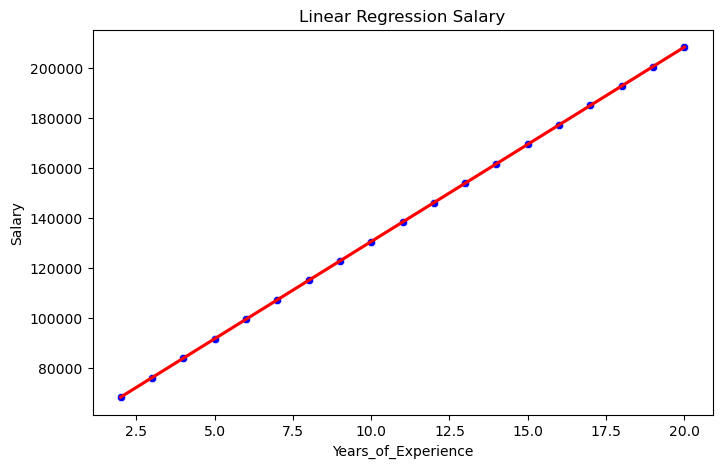

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Years_of_Experience', y='Salary', data=df, color='blue')
sns.regplot(x='Years_of_Experience', y='Salary', data=df, scatter=False, color='red')

plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Salary')

plt.show()

In [19]:
X = df[['Years_of_Experience']]

In [21]:
y = df['Salary']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
lr.score(X_train, y_train)

1.0

In [28]:
lr.score(X_test, y_test)

1.0

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
y_pred = lr.predict(X_test)

In [32]:
mean_absolute_error(y_test, y_pred)

3.7834979593753816e-11

In [33]:
mean_squared_error(y_test, y_pred)

1.6517142471458856e-21

In [34]:
r2_score(y_test, y_pred)

1.0

In [35]:
lr.coef_

array([7777.77777778])

In [36]:
lr.intercept_

np.float64(52815.5577874756)

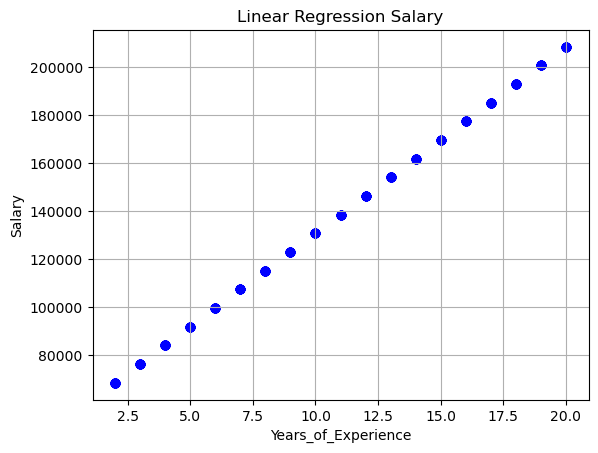

In [40]:
coefficients = lr.coef_
intercept = lr.intercept_

x = np.linspace(0, 20, 100)
y = coefficients*X + intercept

plt.scatter(X,y, label=f'y = {coefficients[0]}x + {intercept}', color='blue')

plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Salary')

plt.grid()
plt.show()

In [46]:
sample = pd.DataFrame([[4], [18]], columns=['Years_of_Experience'])

sample_predictions = lr.predict(sample)
sample_predictions

array([ 83926.66889859, 192815.55778748])